In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from fns import *
setup_directory()
import interp
import out_anl

In [2]:
surfs = ['1n', '2n-trans', '2n-cis', '3n', '4n']
bias = 'No_bias'
base_dir = 'C:\\Users\\User\\Desktop\\backup[s\\1-19-2023\\mnc-pt-pyrid\\calcs\\surfs\\'

d_dims = []
d_tots = []
contcars = []
idcs_for_avg = []
zs = []
avgs = []
for s in surfs:
    newdir = base_dir + s + '\\' + bias + '\\'
    os.chdir(newdir)
    dim = out_anl.get_fftbox(out_anl.clean_out('out'))
    d_dims.append(dim)
    d_tots.append(np.reshape(np.array(np.fromfile('d_tot')), tuple(dim)))
    contcars.append(interp.Poscar(newdir + 'CONTCAR', pc=True))
for i in range(len(surfs)):
    radius_pt = contcars[i].get_conservative_atom_radius(d_dims[i], len(contcars[i].posns) - 1, atom_type='Pt')
    center_pt = contcars[i].get_approx_atom_center_idx(d_dims[i], len(contcars[i].posns) - 1)
    radius_n = contcars[i].get_conservative_atom_radius(d_dims[i], len(contcars[i].posns) - 2, atom_type='N')
    center_n = contcars[i].get_approx_atom_center_idx(d_dims[i], len(contcars[i].posns) - 2)
    idcs_for_avg.append([
        circle_idcs(center_pt[0], center_pt[1], radius_pt),
        circle_idcs(center_n[0], center_n[1], radius_n)
    ])
for i in range(len(surfs)):
    zs.append(range(d_dims[i][0]))
    avgs.append([[],[]])
    for z in zs[-1]:
        slice_z = d_tots[i][:,:,z]
        avgs[-1][0].append(average_slice(slice_z, idcs_for_avg[i][0]))
        avgs[-1][1].append(average_slice(slice_z, idcs_for_avg[i][1]))

(0.0, 25.0)

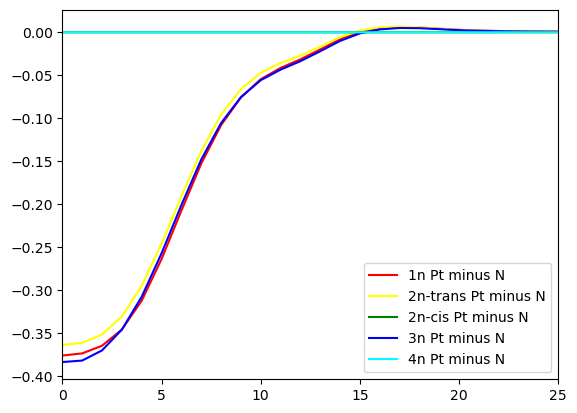

In [3]:
colors = {
    '1n': 'red',
    '2n-trans': 'yellow',
    '2n-cis': 'green',
    '3n': 'blue',
    '4n': 'cyan'
}

for i in range(len(surfs)):
    plt.plot(zs[i], np.array(avgs[i][0]) - np.array(avgs[i][1]), label=surfs[i] + ' Pt minus N', color=colors[surfs[i]], linestyle='solid')
plt.legend()
plt.xlim(0, 25)

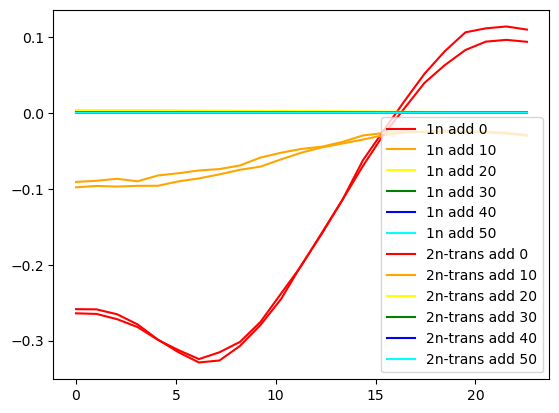

In [11]:
add_heights = [0, 10, 20, 30, 40, 50]
colors = {
    add_heights[0]:'red',
    add_heights[1]:'orange',
    add_heights[2]:'yellow',
    add_heights[3]:'green',
    add_heights[4]:'blue',
    add_heights[5]:'cyan'
}

for i in range(len(surfs[0:2])):
    for j in range(len(add_heights)):
        idx_i = contcars[i].get_approx_atom_center_idx(
        np.shape(d_tots[i]),
        len(contcars[i].posns) - 1
        )
        idx_f = contcars[i].get_approx_atom_center_idx(
        np.shape(d_tots[i]),
        len(contcars[i].posns) - 2
        )
        idx_i[2] = idx_i[2] + add_heights[j]
        idx_f[2] = idx_f[2] + add_heights[j]

        ys = get_density_along_line(d_tots[i], idx_i, idx_f, line_slice_width=2)
        distance = np.linalg.norm(np.array(idx_f) - np.array(idx_i))
        xs = np.arange(0, distance, distance/len(ys))
        plt.plot(xs, ys, label = surfs[i] + ' add ' + str(add_heights[j]), color=colors[add_heights[j]])

plt.legend()

In [44]:
start_vec = np.array([1,0,0])
x = np.random.randn(3)
x -= x.dot(start_vec) * start_vec
x /= np.linalg.norm(x)
x

array([ 0.        , -0.08769993, -0.99614694])

In [46]:
for i in range(-1, 2):
    print(i)


-1
0
1


In [1]:
from fns import *
testlist = [
    np.array([1,1,1]), np.array([1,1,1]), np.array([1,1,1])
]
testitem = np.array([1,1,1])

array_in_list_of_array(testitem, testlist)

True